In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sym
from scipy.integrate import odeint

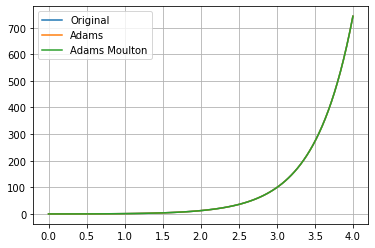

In [112]:
def f(x,y):
    return x + 2*y

def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.

t = np.linspace(0.,4.,100)
h = t[1]-t[0]

def RungeKutta4(x,y,h,f):
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2= f(x[i-1]+0.5*h,y[i-1]+0.5*h*k1)
        k3= f(x[i-1]+0.5*h,y[i-1]+0.5*h*k2)
        k4 = f(x[i-1]+h,y[i-1]+k3*h)
        
        y[i] = y[i-1] + (1/6)*h*(k1+2*k2+2*k3+k4)

#Se inicia con RungeKutta
y4 = np.zeros_like(t)
y4[0] = 0
RungeKutta4(t,y4,h,f)

def GetAdams_45(f,x,yrk1):
    h = x[1]-x[0]
    
    y = yrk1.copy()
    yc = y.copy()
    
    for i in range(5,len(x)):
        #Bashfort 4 puntos
        y[i] = y[i-1]+(1/720)*h*(1901*f(x[i-1],y[i-1])-2774*f(x[i-2],y[i-2])+2616*f(x[i-3],y[i-3])-1274*f(x[i-4],y[i-4])+251*f(x[i-5],y[i-5]))

        yc[i] = y[i]
        #Bashfort Multoun 5 puntos
        yc[i] = yc[i-1]+(1/1440)*h*(475*f(x[i],y[i])+1427*f(x[i-1],y[i-1])-798*f(x[i-2],y[i-2])+482*f(x[i-3],y[i-3])-173*f(x[i-4],y[i-4])+27*f(x[i-5],y[i-5]))
    
    return y,yc

ybash4,ymoulton5 = GetAdams_45(f,t,y4)

plt.plot(t,Solucion(t),label='Original')
plt.plot(t,ybash4,label='Adams')
plt.plot(t,ymoulton5,label='Adams Moulton')
plt.legend()
plt.grid()
plt.show()


**Gráfica diferencias absolutas**

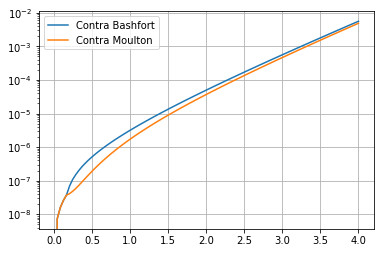

In [113]:
plt.plot(t,np.abs(Solucion(t)-ybash4),label='Contra Bashfort')
plt.plot(t,np.abs(Solucion(t)-ymoulton5),label='Contra Moulton')
plt.yscale("log")
plt.legend()
plt.grid()